In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, HTML
# matplotlib
%matplotlib inline
plt.style.use('seaborn-notebook')

## Load the data

In [2]:
df = pd.read_csv('allUsers.lcl.csv')

In [3]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [4]:
df.Class.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

### Cleaning
1. drop the User column
2. remove the 0 class
3. replace the missing value with nan
4. scaling

In [5]:
df_clean = df.copy(deep=True)

In [6]:
# drop the User column 
df_clean.drop(['User'], axis = 1, inplace = True)
df_clean.head()

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,?,?,?,?,?,?,?,?,?,?
2,1,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,?,?,?,?,?,?,?,?,?,?
3,1,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,?,?,?,?,?,?,?,?,?,?
4,1,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,?,?,?,?,?,?,?,?,?,?


In [7]:
# remove the 0 class
df_clean = df_clean[df_clean['Class'] != 0]

df_clean.head()

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,?,?,?,?,?,?,?,?,?,?
2,1,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,?,?,?,?,?,?,?,?,?,?
3,1,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,?,?,?,?,?,?,?,?,?,?
4,1,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,?,?,?,?,?,?,?,?,?,?
5,1,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,...,?,?,?,?,?,?,?,?,?,?


In [8]:
# replace the missing value by nan
df_clean = df_clean.replace(to_replace='?', value=0)
#df_clean.head()
np.sum(np.sum(df_clean.isna()))

0

In [9]:
# scaling 
from sklearn.preprocessing import Normalizer
X = df_clean.iloc[:, 1:]
y = df_clean.iloc[:, 0]

normalizer = Normalizer().fit(X)
X = pd.DataFrame(normalizer.transform(X))

## Split the data

In [10]:
# split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=0)

## Comparsion of Clustering Algorithm

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import hdbscan 
from time import time
# create a list of clusterers
clusterers = {'kmeans': {
                  'object': KMeans(n_clusters=5, random_state=0), 
                  'runtime': None,
                  'prediction': None},
              'dbscan': {
                  'object': DBSCAN(), 
                  'runtime': None,
                  'prediction': None},
              'agg_cluster': {
                  'object': AgglomerativeClustering(n_clusters = 5),
                  'runtime': None,
                  'prediction': None},
              'hdbscan': {
                  'object': hdbscan.HDBSCAN(min_cluster_size=5),
                  'runtime': None,
                  'prediction': None}
             }

# fit the clusterer to the X_train
for name, clusterer in clusterers.items():
    start_time = time()
    prediction = clusterer['object'].fit_predict(X_train)
    runtime = time() - start_time
    
    for key, value in zip(['runtime', 'prediction'], [runtime, prediction]):
        clusterer[key] = value


In [12]:
# the runtime
for key, clusterer in clusterers.items():
    print(key, ":", clusterer['runtime'])

kmeans : 1.392204761505127
dbscan : 50.065786361694336
agg_cluster : 15.107232570648193
hdbscan : 26.821167469024658


As a prelim analysis on the runtime, K-Means performs the best. The density based clusterings need a quite amount of time. 

In [13]:
from collections import Counter

# the distribution of training samples
distributions = {'true': Counter(y_train)}
print('True: ', distributions['true'])

# the prediction distribution
for key, clusterer in clusterers.items():
    distributions[key] = Counter(clusterer['prediction'])
    print(key, ":", distributions[key])

True:  Counter({3: 3369, 5: 3158, 1: 3151, 2: 2984, 4: 2957})
kmeans : Counter({4: 3881, 3: 3276, 0: 3228, 2: 2738, 1: 2496})
dbscan : Counter({0: 15361, -1: 156, 5: 26, 6: 26, 1: 12, 3: 10, 2: 9, 8: 8, 4: 6, 7: 5})
agg_cluster : Counter({0: 6141, 3: 3400, 1: 3100, 2: 2463, 4: 515})
hdbscan : Counter({-1: 10185, 131: 294, 148: 141, 70: 108, 135: 80, 41: 78, 38: 77, 236: 75, 102: 60, 133: 50, 97: 47, 250: 45, 383: 37, 47: 36, 91: 36, 96: 35, 134: 34, 302: 32, 104: 31, 205: 31, 301: 30, 275: 28, 247: 28, 328: 28, 255: 28, 217: 27, 286: 26, 105: 26, 136: 26, 209: 24, 244: 24, 177: 24, 58: 24, 191: 24, 277: 24, 56: 24, 333: 24, 197: 24, 237: 23, 44: 23, 46: 22, 373: 22, 57: 22, 67: 21, 86: 21, 73: 21, 39: 21, 304: 21, 246: 20, 287: 20, 161: 20, 196: 20, 230: 20, 173: 19, 166: 19, 207: 19, 202: 19, 242: 19, 35: 19, 303: 18, 154: 18, 198: 18, 145: 18, 119: 18, 288: 18, 121: 18, 72: 17, 386: 17, 208: 17, 169: 17, 174: 17, 229: 17, 27: 17, 339: 17, 252: 17, 189: 17, 248: 16, 212: 16, 45: 16, 2

K-Means, Agglomeration clustering are able to generate the assigned number of clusters. However, the number of clusters generated using dbscan and hdbscan depends on the data distribution and the parameters used in the algorithms. 

In [14]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

# generate the cost matrix
cost_matrix = {}
for key in ['kmeans', 'agg_cluster']:
    cost_matrix[key] = confusion_matrix(y_train, clusterers[key]['prediction'])

# apply the Hungarian algorithm
for key, cost in cost_matrix.items():
    row_ind, col_ind = linear_sum_assignment(-cost)
    print('The linear sum: ', cost[row_ind, col_ind].sum())

The linear sum:  7102
The linear sum:  7214


Using the default settings, both K-Means and Agglomeration clustering have similar accuracy on the training sample.

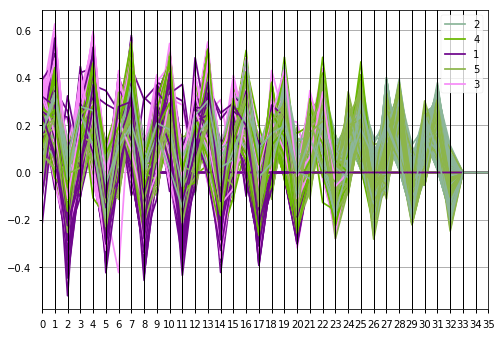

In [43]:
# vizs
from pandas.plotting import parallel_coordinates, andrews_curves

X_y = X_train.copy()
X_y = X_y.assign(Class=y_train.values)

plt.figure()
parallel_coordinates(X_y.iloc[:1000, :], 'Class')

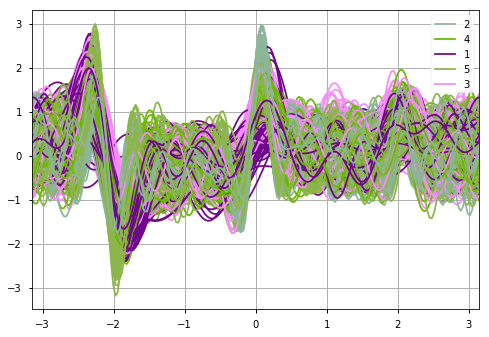

In [40]:
plt.figure()
andrews_curves(X_y.iloc[:1000, :], 'Class')

There are a lot of data are missing, and zeros are assigned to those dimensions. 
This may make the data dense in terms of those dimensions, and thus one big cluster is generated 
based on the density clustering approach. 